#***Integrantes***

* Isaac Cardena
* Jasmín Correa
* Javier Martinez
* Oscar Polma


##Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install pingouin --quiet pingouin
import pingouin as pg ##la usaremos para la prueba de diferencia de medias
import itertools ## la usaremos para realizar las combinaciones de modelos
import statsmodels.api as sm
from sklearn.metrics import accuracy_score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 3.4 MB/s eta 0:00:00


##Conjunto de Datos

In [2]:
url = ("https://raw.githubusercontent.com/leomanriquezm/introduction-to-econometrics/main/df_collapse.csv")

data = pd.read_table(url,delimiter = ",");data

###Sistema Colapsa: Variable dicotomica que asume el valor 1 cuando el sistema de información
#colapsa y 0 cuando no colapsa.
##Consultas: Número de consultas ingresadas en el sistema de información (un unidades de consultas)
###Tiempo Promedio: Tiempo promedio de respuesta por consulta (en segundos)
###Usuarios Registrados: Variable dicotómica que asume el valor 1 si el sistema de información
#recibe consultas de usuarios no registrados y 0 en otro caso.
###Errores: Número de errores reportados en el sistema de información (en unidades de errores)
###Capacidad Servidores: Capacidad de los servidores del sistema de información (en escala de 1 a
#10, un n´umero m´as alto implica una mayor capacidad)

,Sistema_Colapsa,Consultas,Tiempo_Promedio,Usuarios_Registrados,Errores,Capacidad_Servidores
0,0,44,1.113479,0,3,5
1,0,47,2.186888,0,2,9
2,1,64,6.805668,0,4,2
3,1,67,7.489474,1,4,1
4,1,67,6.666282,0,1,5
...,...,...,...,...,...,...
9995,0,7,1.796586,0,4,1
9996,0,29,2.970983,1,2,9
9997,0,39,4.563541,1,4,8
9998,1,72,1.914783,0,2,1


##Prueba de diferencia de medias

Dividimos la base de entregada en dos, tomando cuando Sistema_Colapsa es igual a 0, y cuando es igual a 1 por separado

Grupo sistemas de informacion que colapsan

In [3]:
## sistemas de informacion que colapsan
data_c = data[data["Sistema_Colapsa"] == 1];data_c

,Sistema_Colapsa,Consultas,Tiempo_Promedio,Usuarios_Registrados,Errores,Capacidad_Servidores
2,1,64,6.805668,0,4,2
3,1,67,7.489474,1,4,1
4,1,67,6.666282,0,1,5
6,1,83,7.953420,1,2,6
9,1,87,6.279216,0,4,6
...,...,...,...,...,...,...
9984,1,90,1.575732,0,0,6
9991,1,85,2.442975,0,0,1
9992,1,69,1.101403,1,4,4
9994,1,75,1.475641,1,1,5


Grupo sistemas de informacion que no colapsan

In [4]:
## sistemas de informacion que no colapsan
data_n_c = data[data["Sistema_Colapsa"] == 0];data_n_c

,Sistema_Colapsa,Consultas,Tiempo_Promedio,Usuarios_Registrados,Errores,Capacidad_Servidores
0,0,44,1.113479,0,3,5
1,0,47,2.186888,0,2,9
5,0,9,1.617588,1,1,3
7,0,21,5.646097,1,2,3
8,0,36,3.160718,0,0,6
...,...,...,...,...,...,...
9993,0,14,3.146247,0,3,10
9995,0,7,1.796586,0,4,1
9996,0,29,2.970983,1,2,9
9997,0,39,4.563541,1,4,8


Medias muestrales variable explicativas por grupo que corresponden a los sistemas de informacion que colapsan y los que no

In [5]:
np.mean(data_c[["Consultas", "Tiempo_Promedio", "Errores", "Capacidad_Servidores"]])

22.004371542862362

In [6]:
np.mean(data_n_c[["Consultas", "Tiempo_Promedio", "Errores", "Capacidad_Servidores"]])

9.492855553357895

### Contraste de hipotesis diferencia de medias variable consultas

In [7]:
#Ho: μ1 - μ2 = 0
#Ha: μ1 - μ2 ≠ 0

## usamos pingouin para calcular p-value e intervalos de confianza, para contraste de hipotesis de
## diferencia de medias
pg.ttest(x=data_c["Consultas"], y=data_n_c["Consultas"], alternative='two-sided', correction=False)

## tc > tt

/usr/local/lib/python3.10/dist-packages/pingouin/bayesian.py:152: RuntimeWarning: divide by zero encountered in scalar divide
  bf10 = 1 / ((1 + t**2 / df) ** (-(df + 1) / 2) / integr)


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,172.608864,9998,two-sided,0.0,"[49.41, 50.55]",3.454246,inf,1.0


In [8]:
##calculo estadistico t, realizado por formula

num=np.mean(data_c["Consultas"])-np.mean(data_n_c["Consultas"]) ## diferencia de medias de medias (numerador)
z1=np.var(data_c["Consultas"])/4827 ## varianza consulta grupo 1 dividido tamaño muestra grupo1
z2=np.var(data_n_c["Consultas"])/5173 ## varianza consulta grupo 2 dividido tamaño muestra grupo2
div= (z1+z2)**(1/2) ## raiz cuadrada de suma de varianza consulta grupo 1 dividido tamaño muestra
                    ##grupo1 mas varianza consulta grupo 2 dividido tamaño muestra grupo2 (denominador)
valor_t_consultas = num/div;valor_t_consultas ##numerador dividido denominador formula estadistic t
                                              ## diferencia de  medias

172.85062272393432

Al visualizar el intervalo de confianza, con un 5% de significancia, se puede concluir que la variable ***Consultas*** tiene una diferencia de medias estadisticamente diferente de cero. Por lo que podria ser significativa para el modelo que se estimará.


### Contraste de hipotesis diferencia de medias variable Tiempo_Promedio

In [9]:
#Ho: μ1 - μ2 = 0
#Ha: μ1 - μ2 ≠ 0

## usamos pingouin para calcular p-value e intervalos de confianza, para contraste de hipotesis de
## diferencia de medias
pg.ttest(x=data_c["Tiempo_Promedio"], y=data_n_c["Tiempo_Promedio"], alternative='two-sided', correction=False)

## tc < tt

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.042058,9998,two-sided,0.966454,"[-0.1, 0.1]",0.000842,0.023,0.050203


Al visualizar el intervalo de confianza, con un 5% de significancia, se puede concluir que la variable ***Tiempo_Promedio*** tiene una diferencia de medias que no es estadisticamente diferente de cero. Por lo que con los datos proporcionados no es posible rechazar la hipotesis nula.

### Contraste de hipotesis diferencia de medias variable Errores

In [10]:
#Ho: μ1 - μ2 = 0
#Ha: μ1 - μ2 ≠ 0

## usamos pingouin para calcular p-value e intervalos de confianza, para contraste de hipotesis de
## diferencia de medias
pg.ttest(x=data_c["Errores"], y=data_n_c["Errores"], alternative='two-sided', correction=False)

## tc < tt

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.258026,9998,two-sided,0.208412,"[-0.02, 0.09]",0.025176,0.05,0.241967


Al visualizar el intervalo de confianza, con un 5% de significancia, se puede concluir que la variable ***Errores*** tiene una diferencia de medias que no es estadisticamente diferente de cero. Por lo que con los datos proporcionados no es posible rechazar la hipotesis nula.

### Contraste de hipotesis diferencia de medias variable Capacidad_Servidores

In [11]:
#Ho: μ1 - μ2 = 0
#Ha: μ1 - μ2 ≠ 0

## usamos pingouin para calcular p-value e intervalos de confianza, para contraste de hipotesis de
## diferencia de medias
pg.ttest(x=data_c["Capacidad_Servidores"], y=data_n_c["Capacidad_Servidores"], alternative='two-sided', correction=False)

## tc < tt

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.604596,9998,two-sided,0.545462,"[-0.08, 0.15]",0.012099,0.027,0.092807


Al visualizar el intervalo de confianza, con un 5% de significancia, se puede concluir que la variable ***Capacidad_Servidores*** tiene una diferencia de medias que no es estadisticamente diferente de cero. Por lo que con los datos proporcionados no es posible rechazar la hipotesis nula.

## 2. Especificacion del modelo de probabilidad lineal

###Combinaciones modelos de probabilidad lineal

In [12]:
## creamos todas las combinaciones posibles con las variables explicativas señaladas
variables = list(data[["Consultas", "Tiempo_Promedio", "Errores", "Capacidad_Servidores"]].columns)

#generates all possible combinations of the variables
combinations = []
for r in range(1, len(variables) + 1):
    for combo in itertools.combinations(variables, r):
      print(combo)

('Consultas',)
('Tiempo_Promedio',)
('Errores',)
('Capacidad_Servidores',)
('Consultas', 'Tiempo_Promedio')
('Consultas', 'Errores')
('Consultas', 'Capacidad_Servidores')
('Tiempo_Promedio', 'Errores')
('Tiempo_Promedio', 'Capacidad_Servidores')
('Errores', 'Capacidad_Servidores')
('Consultas', 'Tiempo_Promedio', 'Errores')
('Consultas', 'Tiempo_Promedio', 'Capacidad_Servidores')
('Consultas', 'Errores', 'Capacidad_Servidores')
('Tiempo_Promedio', 'Errores', 'Capacidad_Servidores')
('Consultas', 'Tiempo_Promedio', 'Errores', 'Capacidad_Servidores')


####Modelo 1

In [13]:
#Sistema_Colapsa = b0 + b1 * Consultas + μ

X = data[["Consultas"]]
y = data["Sistema_Colapsa"]

model = sm.OLS(y, sm.add_constant(X)).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Sistema_Colapsa   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                 2.979e+04
Date:                Wed, 05 Jun 2024   Prob (F-statistic):               0.00
Time:                        04:24:50   Log-Likelihood:                -345.54
No. Observations:               10000   AIC:                             695.1
Df Residuals:                    9998   BIC:                             709.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2539      0.005    -51.307      0.0

In [14]:
## 0.55 es el umbral

## el % de casos correctamente predichos (según umbral determinado)
accuracy = accuracy_score(y, [1 if y > 0.55 else 0 for y in model.fittedvalues])
## SETEAMOS EL UMBRAL EN 0.XX
accuracy_percentage =  accuracy * 100

print(f"Casos correctamente predichos: {accuracy_percentage:.2f}%")

Casos correctamente predichos: 97.04%


####Modelo 2

In [15]:
#Sistema_Colapsa = b0 + b1 * Tiempo_Promedio + μ

X2 = data[["Tiempo_Promedio"]]
y = data["Sistema_Colapsa"]

model2 = sm.OLS(y, sm.add_constant(X2)).fit()

print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:        Sistema_Colapsa   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                  0.001769
Date:                Wed, 05 Jun 2024   Prob (F-statistic):              0.966
Time:                        04:24:51   Log-Likelihood:                -7251.9
No. Observations:               10000   AIC:                         1.451e+04
Df Residuals:                    9998   BIC:                         1.452e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.4831      0.012     

In [16]:
## 0.55 es el umbral

## el % de casos correctamente predichos (según umbral determinado)
accuracy2 = accuracy_score(y, [1 if y > 0.55 else 0 for y in model2.fittedvalues])
## SETEAMOS EL UMBRAL EN 0.XX
accuracy_percentage2 =  accuracy2 * 100

print(f"Casos correctamente predichos: {accuracy_percentage2:.2f}%")

Casos correctamente predichos: 51.73%


####Modelo 3

In [17]:
#Sistema_Colapsa = b0 + b1 * Errores + μ

X3 = data[["Errores"]]
y = data["Sistema_Colapsa"]

model3 = sm.OLS(y, sm.add_constant(X3)).fit()

print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:        Sistema_Colapsa   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.583
Date:                Wed, 05 Jun 2024   Prob (F-statistic):              0.208
Time:                        04:24:51   Log-Likelihood:                -7251.1
No. Observations:               10000   AIC:                         1.451e+04
Df Residuals:                    9998   BIC:                         1.452e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4737      0.009     54.217      0.0

In [18]:
## 0.55 es el umbral

## el % de casos correctamente predichos (según umbral determinado)
accuracy3 = accuracy_score(y, [1 if y > 0.55 else 0 for y in model3.fittedvalues])
## SETEAMOS EL UMBRAL EN 0.XX
accuracy_percentage3 =  accuracy3 * 100

print(f"Casos correctamente predichos: {accuracy_percentage3:.2f}%")

Casos correctamente predichos: 51.73%


####Modelo 4

In [19]:
#Sistema_Colapsa = b0 + b1 * Capacidad_Servidores + μ

X4 = data[["Capacidad_Servidores"]]
y = data["Sistema_Colapsa"]

model4 = sm.OLS(y, sm.add_constant(X4)).fit()

print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:        Sistema_Colapsa   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3655
Date:                Wed, 05 Jun 2024   Prob (F-statistic):              0.545
Time:                        04:24:51   Log-Likelihood:                -7251.7
No. Observations:               10000   AIC:                         1.451e+04
Df Residuals:                    9998   BIC:                         1.452e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4769 

In [20]:
## 0.55 es el umbral

## el % de casos correctamente predichos (según umbral determinado)
accuracy4 = accuracy_score(y, [1 if y > 0.55 else 0 for y in model4.fittedvalues])
## SETEAMOS EL UMBRAL EN 0.XX
accuracy_percentage4 =  accuracy4 * 100

print(f"Casos correctamente predichos: {accuracy_percentage4:.2f}%")

Casos correctamente predichos: 51.73%


####Modelo 5

In [21]:
#Sistema_Colapsa = b0 + b1 * Consultas + b2 * Tiempo_Promedio + μ

X5 = data[["Consultas","Tiempo_Promedio"]]
y = data["Sistema_Colapsa"]

model5 = sm.OLS(y, sm.add_constant(X5)).fit()

print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:        Sistema_Colapsa   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                 1.490e+04
Date:                Wed, 05 Jun 2024   Prob (F-statistic):               0.00
Time:                        04:24:51   Log-Likelihood:                -343.34
No. Observations:               10000   AIC:                             692.7
Df Residuals:                    9997   BIC:                             714.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.2651      0.007    -

In [22]:
## 0.55 es el umbral

## el % de casos correctamente predichos (según umbral determinado)
accuracy5 = accuracy_score(y, [1 if y > 0.55 else 0 for y in model5.fittedvalues])
## SETEAMOS EL UMBRAL EN 0.XX
accuracy_percentage5 =  accuracy5 * 100

print(f"Casos correctamente predichos: {accuracy_percentage5:.2f}%")

Casos correctamente predichos: 96.87%


####Modelo 6

In [23]:
#Sistema_Colapsa = b0 + b1 * Consultas + b2 * Errores + μ

X6 = data[["Consultas","Errores"]]
y = data["Sistema_Colapsa"]

model6 = sm.OLS(y, sm.add_constant(X6)).fit()

print(model6.summary())

                            OLS Regression Results                            
Dep. Variable:        Sistema_Colapsa   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                 1.490e+04
Date:                Wed, 05 Jun 2024   Prob (F-statistic):               0.00
Time:                        04:24:51   Log-Likelihood:                -345.38
No. Observations:               10000   AIC:                             696.8
Df Residuals:                    9997   BIC:                             718.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2559      0.006    -42.036      0.0

In [24]:
## 0.55 es el umbral

## el % de casos correctamente predichos (según umbral determinado)
accuracy6 = accuracy_score(y, [1 if y > 0.55 else 0 for y in model6.fittedvalues])
## SETEAMOS EL UMBRAL EN 0.XX
accuracy_percentage6 =  accuracy6 * 100

print(f"Casos correctamente predichos: {accuracy_percentage6:.2f}%")

Casos correctamente predichos: 97.04%


####Modelo 7

In [25]:
#Sistema_Colapsa = b0 + b1 * Consultas + b2 * Capacidad_Servidores + μ

X7 = data[["Consultas","Capacidad_Servidores"]]
y = data["Sistema_Colapsa"]

model7 = sm.OLS(y, sm.add_constant(X7)).fit()

print(model7.summary())

                            OLS Regression Results                            
Dep. Variable:        Sistema_Colapsa   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                 1.490e+04
Date:                Wed, 05 Jun 2024   Prob (F-statistic):               0.00
Time:                        04:24:51   Log-Likelihood:                -345.36
No. Observations:               10000   AIC:                             696.7
Df Residuals:                    9997   BIC:                             718.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.2567 

In [26]:
## 0.55 es el umbral

## el % de casos correctamente predichos (según umbral determinado)
accuracy7 = accuracy_score(y, [1 if y > 0.55 else 0 for y in model7.fittedvalues])
## SETEAMOS EL UMBRAL EN 0.XX
accuracy_percentage7 =  accuracy7 * 100

print(f"Casos correctamente predichos: {accuracy_percentage7:.2f}%")

Casos correctamente predichos: 97.04%


####Modelo 8

In [27]:
#Sistema_Colapsa = b0 + b1 * Tiempo_Promedio + b2 * Errores + μ

X8 = data[["Tiempo_Promedio","Errores"]]
y = data["Sistema_Colapsa"]

model8 = sm.OLS(y, sm.add_constant(X8)).fit()

print(model8.summary())

                            OLS Regression Results                            
Dep. Variable:        Sistema_Colapsa   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7920
Date:                Wed, 05 Jun 2024   Prob (F-statistic):              0.453
Time:                        04:24:52   Log-Likelihood:                -7251.1
No. Observations:               10000   AIC:                         1.451e+04
Df Residuals:                    9997   BIC:                         1.453e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.4741      0.014     

In [28]:
## 0.55 es el umbral

## el % de casos correctamente predichos (según umbral determinado)
accuracy8 = accuracy_score(y, [1 if y > 0.55 else 0 for y in model8.fittedvalues])
## SETEAMOS EL UMBRAL EN 0.XX
accuracy_percentage8 =  accuracy8 * 100

print(f"Casos correctamente predichos: {accuracy_percentage8:.2f}%")

Casos correctamente predichos: 51.73%


####Modelo 9

In [29]:
#Sistema_Colapsa = b0 + b1 * Tiempo_Promedio + b2 * Capacidad_Servidores + μ

X9 = data[["Tiempo_Promedio","Capacidad_Servidores"]]
y = data["Sistema_Colapsa"]

model9 = sm.OLS(y, sm.add_constant(X9)).fit()

print(model9.summary())

                            OLS Regression Results                            
Dep. Variable:        Sistema_Colapsa   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1836
Date:                Wed, 05 Jun 2024   Prob (F-statistic):              0.832
Time:                        04:24:52   Log-Likelihood:                -7251.7
No. Observations:               10000   AIC:                         1.451e+04
Df Residuals:                    9997   BIC:                         1.453e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4774 

In [30]:
## 0.55 es el umbral

## el % de casos correctamente predichos (según umbral determinado)
accuracy9 = accuracy_score(y, [1 if y > 0.55 else 0 for y in model9.fittedvalues])
## SETEAMOS EL UMBRAL EN 0.XX
accuracy_percentage9 =  accuracy9 * 100

print(f"Casos correctamente predichos: {accuracy_percentage9:.2f}%")

Casos correctamente predichos: 51.73%


####Modelo 10

In [31]:
#Sistema_Colapsa = b0 + b1 * Errores + b2 * Capacidad_Servidores + μ

X10 = data[["Errores","Capacidad_Servidores"]]
y = data["Sistema_Colapsa"]

model10 = sm.OLS(y, sm.add_constant(X10)).fit()

print(model10.summary())

                            OLS Regression Results                            
Dep. Variable:        Sistema_Colapsa   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9719
Date:                Wed, 05 Jun 2024   Prob (F-statistic):              0.378
Time:                        04:24:52   Log-Likelihood:                -7251.0
No. Observations:               10000   AIC:                         1.451e+04
Df Residuals:                    9997   BIC:                         1.453e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4680 

In [32]:
## 0.55 es el umbral

## el % de casos correctamente predichos (según umbral determinado)
accuracy10 = accuracy_score(y, [1 if y > 0.55 else 0 for y in model10.fittedvalues])
## SETEAMOS EL UMBRAL EN 0.XX
accuracy_percentage10 =  accuracy10 * 100

print(f"Casos correctamente predichos: {accuracy_percentage10:.2f}%")

Casos correctamente predichos: 51.73%


####Modelo 11

In [33]:
#Sistema_Colapsa = b0 + b1 * Consultas + b2 * Tiempo_Promedio + b3 * Errores + μ

X11 = data[["Consultas","Tiempo_Promedio", "Errores"]]
y = data["Sistema_Colapsa"]

model11 = sm.OLS(y, sm.add_constant(X11)).fit()

print(model11.summary())

                            OLS Regression Results                            
Dep. Variable:        Sistema_Colapsa   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     9936.
Date:                Wed, 05 Jun 2024   Prob (F-statistic):               0.00
Time:                        04:24:52   Log-Likelihood:                -343.18
No. Observations:               10000   AIC:                             694.4
Df Residuals:                    9996   BIC:                             723.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.2671      0.008    -

In [34]:
## 0.55 es el umbral

## el % de casos correctamente predichos (según umbral determinado)
accuracy11 = accuracy_score(y, [1 if y > 0.55 else 0 for y in model11.fittedvalues])
## SETEAMOS EL UMBRAL EN 0.XX
accuracy_percentage11 =  accuracy11 * 100

print(f"Casos correctamente predichos: {accuracy_percentage11:.2f}%")

Casos correctamente predichos: 96.90%


####Modelo 12

In [35]:
#Sistema_Colapsa = b0 + b1 * Consultas + b2 * Tiempo_Promedio + b3 * Capacidad_Servidores + μ

X12 = data[["Consultas","Tiempo_Promedio", "Capacidad_Servidores"]]
y = data["Sistema_Colapsa"]

model12 = sm.OLS(y, sm.add_constant(X12)).fit()

print(model12.summary())

                            OLS Regression Results                            
Dep. Variable:        Sistema_Colapsa   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     9936.
Date:                Wed, 05 Jun 2024   Prob (F-statistic):               0.00
Time:                        04:24:52   Log-Likelihood:                -343.16
No. Observations:               10000   AIC:                             694.3
Df Residuals:                    9996   BIC:                             723.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.2680 

In [36]:
## 0.55 es el umbral

## el % de casos correctamente predichos (según umbral determinado)
accuracy12 = accuracy_score(y, [1 if y > 0.55 else 0 for y in model12.fittedvalues])
## SETEAMOS EL UMBRAL EN 0.XX
accuracy_percentage12 =  accuracy12 * 100

print(f"Casos correctamente predichos: {accuracy_percentage12:.2f}%")

Casos correctamente predichos: 96.90%


####Modelo 13

In [37]:
#Sistema_Colapsa = b0 + b1 * Consultas + b2 * Errores + b3 * Capacidad_Servidores + μ

X13 = data[["Consultas","Errores", "Capacidad_Servidores"]]
y = data["Sistema_Colapsa"]

model13 = sm.OLS(y, sm.add_constant(X13)).fit()

print(model13.summary())

                            OLS Regression Results                            
Dep. Variable:        Sistema_Colapsa   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     9930.
Date:                Wed, 05 Jun 2024   Prob (F-statistic):               0.00
Time:                        04:24:52   Log-Likelihood:                -345.21
No. Observations:               10000   AIC:                             698.4
Df Residuals:                    9996   BIC:                             727.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.2587 

In [38]:
## 0.55 es el umbral

## el % de casos correctamente predichos (según umbral determinado)
accuracy13 = accuracy_score(y, [1 if y > 0.55 else 0 for y in model13.fittedvalues])
## SETEAMOS EL UMBRAL EN 0.XX
accuracy_percentage13 =  accuracy13 * 100

print(f"Casos correctamente predichos: {accuracy_percentage13:.2f}%")

Casos correctamente predichos: 97.04%


####Modelo 14

In [39]:
#Sistema_Colapsa = b0 + b1 * Tiempo_Promedio + b2 * Errores + b3 * Capacidad_Servidores + μ

X14 = data[["Tiempo_Promedio","Errores", "Capacidad_Servidores"]]
y = data["Sistema_Colapsa"]

model14 = sm.OLS(y, sm.add_constant(X14)).fit()

print(model14.summary())

                            OLS Regression Results                            
Dep. Variable:        Sistema_Colapsa   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6484
Date:                Wed, 05 Jun 2024   Prob (F-statistic):              0.584
Time:                        04:24:52   Log-Likelihood:                -7251.0
No. Observations:               10000   AIC:                         1.451e+04
Df Residuals:                    9996   BIC:                         1.454e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4684 

In [40]:
## 0.55 es el umbral

## el % de casos correctamente predichos (según umbral determinado)
accuracy14 = accuracy_score(y, [1 if y > 0.55 else 0 for y in model14.fittedvalues])
## SETEAMOS EL UMBRAL EN 0.XX
accuracy_percentage14 =  accuracy14 * 100

print(f"Casos correctamente predichos: {accuracy_percentage14:.2f}%")

Casos correctamente predichos: 51.73%


####Modelo 15

In [41]:
#Sistema_Colapsa = b0 + b1 * Consultas + b2 * Tiempo_Promedio + b3 * Errores + b4 * Capacidad_Servidores + μ

X15 = data[["Consultas", "Tiempo_Promedio", "Errores", "Capacidad_Servidores"]]
y = data["Sistema_Colapsa"]

model15 = sm.OLS(y, sm.add_constant(X15)).fit()

print(model15.summary())

                            OLS Regression Results                            
Dep. Variable:        Sistema_Colapsa   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     7451.
Date:                Wed, 05 Jun 2024   Prob (F-statistic):               0.00
Time:                        04:24:53   Log-Likelihood:                -343.00
No. Observations:               10000   AIC:                             696.0
Df Residuals:                    9995   BIC:                             732.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.2700 

In [42]:
## 0.55 es el umbral

## el % de casos correctamente predichos (según umbral determinado)
accuracy15 = accuracy_score(y, [1 if y > 0.55 else 0 for y in model15.fittedvalues])
## SETEAMOS EL UMBRAL EN 0.XX
accuracy_percentage15 =  accuracy15 * 100

print(f"Casos correctamente predichos: {accuracy_percentage15:.2f}%")

Casos correctamente predichos: 96.91%


### Modelo escogido

In [43]:
##modelo 1

print(model.summary())

#Sistema_Colapsa = -0.2539 + 0.0150 * Consultas

                            OLS Regression Results                            
Dep. Variable:        Sistema_Colapsa   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                 2.979e+04
Date:                Wed, 05 Jun 2024   Prob (F-statistic):               0.00
Time:                        04:24:53   Log-Likelihood:                -345.54
No. Observations:               10000   AIC:                             695.1
Df Residuals:                    9998   BIC:                             709.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2539      0.005    -51.307      0.0

###Simulacion de datos de columna ***consultas*** con el modelo seleccionado.

In [44]:
X_test=pd.DataFrame({'Constant': [1]*10000,
                     'Consultas': data["Consultas"]})

y_pred=model.predict(X_test);y_pred

0       0.405301
1       0.450246
2       0.704930
3       0.749875
4       0.749875
          ...   
9995   -0.149013
9996    0.180579
9997    0.330394
9998    0.824782
9999    0.465227
Length: 10000, dtype: float64

Simulacion de promedio variable consultas con el modelo seleccionado.

In [45]:
X_test2=pd.DataFrame({'Constant': [1],
                     'Consultas': [49]})

y_pred2=model.predict(X_test);y_pred2

0       0.405301
1       0.450246
2       0.704930
3       0.749875
4       0.749875
          ...   
9995   -0.149013
9996    0.180579
9997    0.330394
9998    0.824782
9999    0.465227
Length: 10000, dtype: float64

### Graficar los valores reales vs. los valores predichos

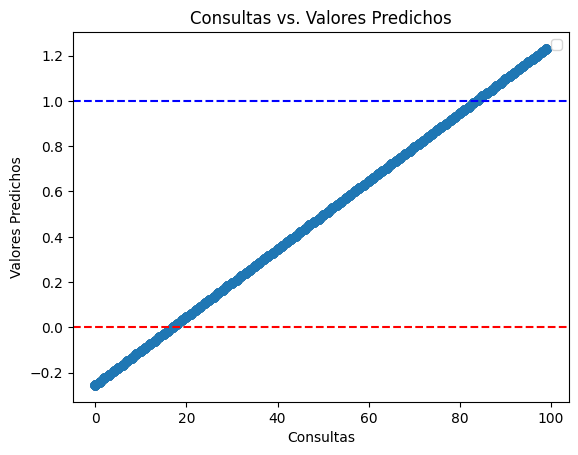

In [46]:
plt.scatter(data["Consultas"], y_pred, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.axhline(1, color='blue', linestyle='--')
plt.xlabel('Consultas')
plt.ylabel('Valores Predichos')
plt.title('Consultas vs. Valores Predichos')
plt.legend()
plt.show()

##Justificacion del modelo escogido

In [47]:
# prueba de hipotesis beta1

#Ho: b1 = 0
#Ha: b1 ≠ 0

#Sistema_Colapsa = -0.2539 + 0.0150 * Consultas

accuracy = accuracy_score(y, [1 if y > 0.55 else 0 for y in model.fittedvalues])
accuracy_percentage =  accuracy * 100

print(f"Casos correctamente predichos: {accuracy_percentage:.2f}%")

Casos correctamente predichos: 97.04%


El modelo fue elegido porque explica un 97.04% de casos correctamente predichos, y si bien hay otros modelos que explican el mismo porcentaje de casos correctamente predichos, no fueron escogidos ya que están siendo explicado por variables que podrían ser estadísticamente no diferentes de cero, además hay que destacar que la variable consultas, la cual es la variable explicativa del modelo, está presente en los demás modelos que explican un alto porcentaje de casos correctamente predichos. Por otra parte, este modelo fue escogido ya que al realizar la prueba de diferencia de medias se logró concluir que sólo la variable consultas tenía una diferencia de medias estadísticamente diferente de 0, a diferencia de las otras variables en las cuales su diferencia de medias si podían ser 0

##Interpretación de cada uno de los coeficientes estimados
El valor de beta0 es -0.2539 que se puede interpretar como el valor esperado de ***Sistema_Colapsa*** cuando ***Consultas*** es igual a cero. por lo que se espera que, con un 25.39% de probabilidad, se espera que el sistema colapse cuando no hay consultas

 el valor de beta1 es 0.0150 significa que, permaneciendo los demas factores constantes, una consulta mas hace que la probabilidad que el sistema colapse aumente en 0.0150 puntos. incluso 50 consultas mas aumentan la probabilidad de colapso en (0.0150 * 50 = 0.75).



##Utilidad del modelo al problema planteado por la empresa

El modelo permite a la empresa predecir la probabilidad de que su sistema de información colapse en función del número de consultas ingresadas. Esto puede ser valioso para la planificación operativa y la asignación de recursos. Por ejemplo, la empresa puede tomar medidas preventivas cuando la probabilidad de colapso es alta.
Con este modelo la empresa puede tomar varias decisiones para prever un colapso del sistema, la primera de ellas es invertir recursos en el sistema para mejorar su capacidad y pueda soportar un mayor número de consultas, evitando así el colapso de este, o bien puede crear una fila de espera que evite que muchos usuarios ingresen al sistema al mismo tiempo y lo colapsen.




